In [280]:
import numpy as np
from matplotlib import pyplot as plt

In [281]:
def gaussian_basis(x, u, s):
    x = np.exp(-(x-u)**2/(2*s**2))
    return x
    
def sigmoidal_basis(x, u, s):
    x = 1/(1 + np.exp(-(x-u)/s))
    return x

def identity_basis(x):
    return x

In [282]:
def linear_fn(x, a=4, b=3):
    y = a + b * x
    t = y + np.random.randn(len(x), 1)
    return t

## Batch Learning

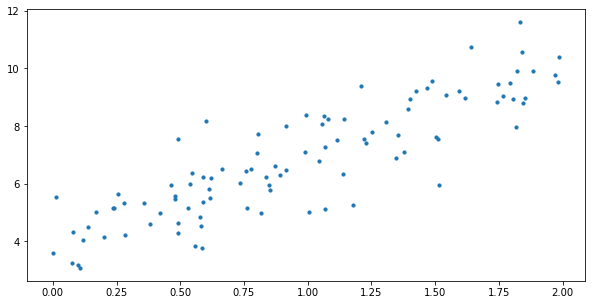

In [283]:
# Generate fake data
steps = 100
x = 2 * np.random.rand(steps, 1)
t = linear_fn(x)
plt.figure(figsize=(10, 5))
plt.scatter(x, t, s=10)

In [284]:
M = 2
x = x.reshape(-1, 1)
# Design Matrix is denoted by X
bias = np.ones(steps).reshape(-1, 1)
X = np.repeat(x, M-1, axis=1)
X = np.concatenate((bias, X), axis=1)

In [285]:
w = np.matmul(X.T, X)
w = np.linalg.inv(w)
w = np.matmul(w, X.T)
w = np.matmul(w, t)
w = w.reshape(-1, 1)
w

array([[3.8801087 ],
       [3.07573409]])

In [286]:
t_hat = np.matmul(w.T, X.T).T

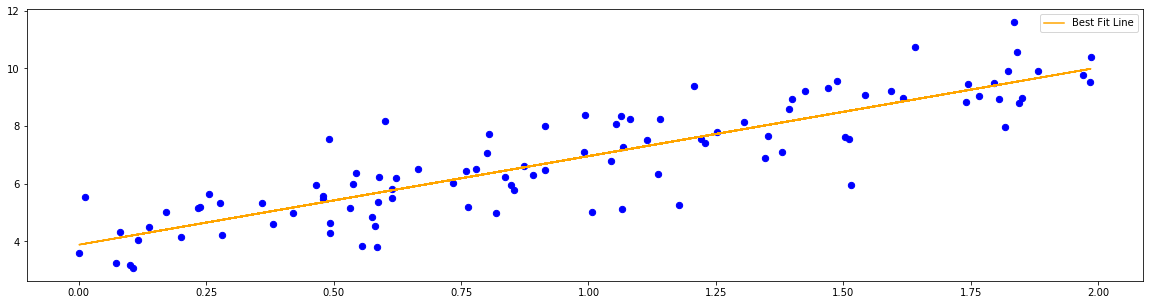

In [287]:
plt.figure(figsize=(20, 5))
plt.scatter(x, t, s=40, c='blue')
plt.plot(x, t_hat, label='Best Fit Line', c='orange')
plt.legend()

### Regularized Least Squares

In [318]:
M = 2
x = x.reshape(-1, 1)
# Design Matrix is denoted by X
bias = np.ones(steps).reshape(-1, 1)
X = np.repeat(x, M-1, axis=1)
X = np.concatenate((bias, X), axis=1)
lmbda = 0.5

In [319]:
w = np.matmul(X.T, X)
w = w + lmbda * np.eye(len(w))
w = np.linalg.inv(w)
w = np.matmul(w, X.T)
w = np.matmul(w, t)
w = w.reshape(-1, 1)
print('Weights:', w.flatten())

Weights: [3.8513172  3.08565041]


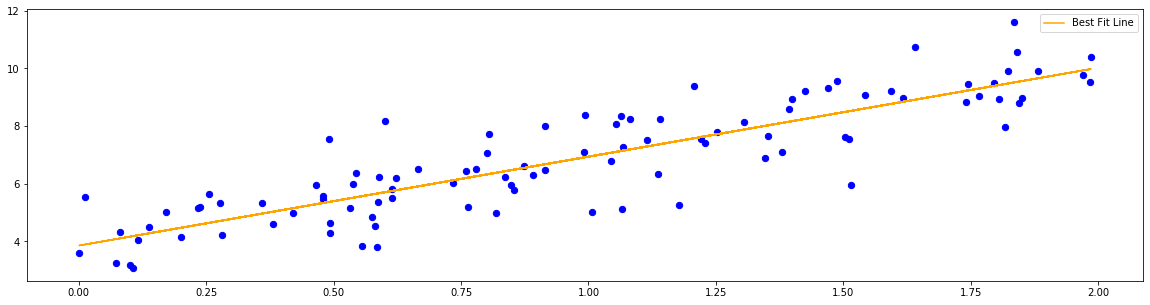

In [320]:
t_hat = np.matmul(w.T, X.T).T
plt.figure(figsize=(20, 5))
plt.scatter(x, t, s=40, c='blue')
plt.plot(x, t_hat, label='Best Fit Line', c='orange')
plt.legend()

## Sequential Online Learning

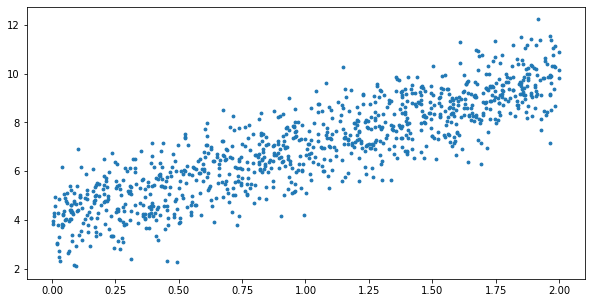

In [265]:
x = 2 * np.random.rand(1000, 1)
y = 4 + 3 * x
t = y + np.random.randn(1000, 1)

plt.figure(figsize=(10, 5))
plt.scatter(x, t, s=8)

In [266]:
# init weight parameters
w = np.random.randn(2, 1)
print('Init Weights:', w.flatten())
X = np.hstack((np.ones(x.shape), x)).T
learning_rate = 0.01

for _ in range(10):
    for i in range(10):
        start = i*10
        end = start + 10
        x_ = X[:, start:end]
        t_ = t[start:end]
        loss = t_ - np.matmul(w.T, x_).T
        loss = np.matmul(loss.T, x_.T).T
        w = w + learning_rate * loss
        
print('Weights after training:', w.flatten())

Init Weights: [-1.10842919  0.97184336]
Weights after training: [3.75570619 3.1268253 ]


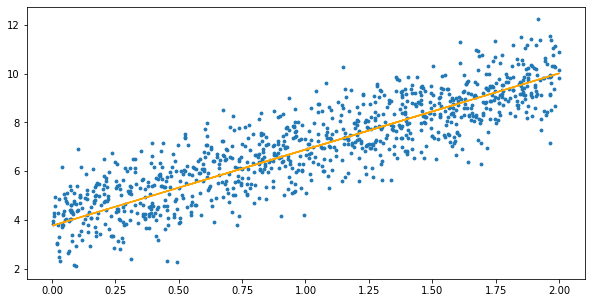

In [267]:
plt.figure(figsize=(10, 5))
plt.scatter(x, t, s=8)
t_hat = np.matmul(w.T, X).reshape(-1, 1)
plt.plot(x, t_hat, c='orange')